In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

In [20]:
#read the file I downloaded from https://www.kaggle.com/aestheteaman01/278k-us-wildfires-due-to-lightning-2004-2015
fire = pd.read_csv(r'C:\ArcGISWildfire\WildfireProject\Data\US_Lightning_Forest_Fires.csv')

In [27]:
#look at the first 10 lines to see what sort of data we have
fire.head(10)

,Unnamed: 0,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,STAT_CAUSE_DESCR,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,0,1,2004,05-12-2004,845.0,Lightning,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,1,3,2004,06-28-2004,1600.0,Lightning,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,2,4,2004,06-28-2004,1600.0,Lightning,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,3,5,2004,06-30-2004,1800.0,Lightning,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,4,6,2004,07-01-2004,1800.0,Lightning,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado
5,5,9,2004,07-01-2004,1800.0,Lightning,1.0,1800.0,0.10,A,38.548333,-120.149167,CA,5.0,Amador
6,6,10,2004,07-02-2004,1830.0,Lightning,1.0,1900.0,0.10,A,38.691667,-120.159722,CA,17.0,El Dorado
7,7,11,2004,07-02-2004,1730.0,Lightning,1.0,2000.0,0.10,A,38.527500,-120.106111,CA,5.0,Amador
8,8,14,2004,10-03-2004,630.0,Lightning,0.0,1500.0,0.20,A,38.675833,-120.279722,CA,17.0,El Dorado
9,9,15,2004,10-03-2004,930.0,Lightning,0.0,1400.0,0.10,A,38.564167,-120.542222,CA,17.0,El Dorado


In [28]:
#brief overview of the entire dataset including columns, column type and non null count for what % of data is present in each
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278468 entries, 0 to 278467
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               278468 non-null  int64  
 1   index                    278468 non-null  int64  
 2   FIRE_YEAR                278468 non-null  int64  
 3   Fire_Date                278468 non-null  object 
 4   DISCOVERY_TIME           228272 non-null  float64
 5   STAT_CAUSE_DESCR         278468 non-null  object 
 6   Days_to_extinguish_fire  227876 non-null  float64
 7   CONT_TIME                220068 non-null  float64
 8   FIRE_SIZE                278468 non-null  float64
 9   FIRE_SIZE_CLASS          278468 non-null  object 
 10  LATITUDE                 278468 non-null  float64
 11  LONGITUDE                278468 non-null  float64
 12  STATE                    278468 non-null  object 
 13  FIPS_CODE                156911 non-null  float64
 14  FIPS

In [29]:
#Count of fires that took x number of days to be extinguished
fire['Days_to_extinguish_fire'].value_counts()

0.0      122018
1.0       58263
2.0       15725
3.0        6719
4.0        3900
          ...  
187.0         1
170.0         1
230.0         1
262.0         1
163.0         1
Name: Days_to_extinguish_fire, Length: 210, dtype: int64

<AxesSubplot:>

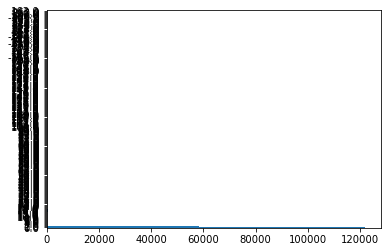

In [37]:
#bar chart to visualize how many days lightning strike fires took to put out- this graph has EVERYTHING and it's hard to visualize
fire['Days_to_extinguish_fire'].value_counts().plot(kind='barh')


<AxesSubplot:>

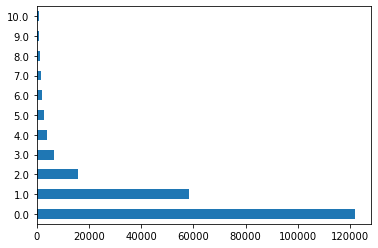

In [39]:
#looking at a bar chart with counts of fires taking between 0 and 10 days to put out
fire['Days_to_extinguish_fire'].value_counts()[:10].plot(kind='barh')

In [42]:
#Now we will look at where these lightning strike wildfires are by state; count of lightning strike wildfires by state
from collections import Counter
print(Counter(fire['STATE']))

Counter({'OR': 31556, 'AZ': 28776, 'CA': 27000, 'FL': 21806, 'ID': 21291, 'CO': 19945, 'NM': 18006, 'MT': 17635, 'UT': 16747, 'NV': 11174, 'WA': 9694, 'GA': 7748, 'TX': 6797, 'WY': 6461, 'SD': 5294, 'NY': 5246, 'AK': 4108, 'LA': 2893, 'AR': 2087, 'SC': 1996, 'NC': 1934, 'OK': 1401, 'AL': 1320, 'VA': 1065, 'NE': 1030, 'MN': 959, 'WI': 681, 'MS': 551, 'MI': 514, 'TN': 445, 'ND': 418, 'ME': 336, 'WV': 265, 'NJ': 208, 'KS': 203, 'MO': 164, 'PA': 148, 'KY': 128, 'MD': 124, 'MA': 88, 'NH': 82, 'IL': 33, 'IN': 30, 'OH': 17, 'CT': 17, 'IA': 16, 'DE': 10, 'VT': 9, 'HI': 9, 'PR': 2, 'DC': 1})


In [44]:
#Grouping our data by the number of values in each column by state
State = fire.groupby('STATE').agg('count')
print(State)

       Unnamed: 0  index  FIRE_YEAR  Fire_Date  DISCOVERY_TIME  \
STATE                                                            
AK           4108   4108       4108       4108            3208   
AL           1320   1320       1320       1320             740   
AR           2087   2087       2087       2087            1248   
AZ          28776  28776      28776      28776           28479   
CA          27000  27000      27000      27000           24100   
CO          19945  19945      19945      19945           19437   
CT             17     17         17         17              15   
DC              1      1          1          1               1   
DE             10     10         10         10               0   
FL          21806  21806      21806      21806            7437   
GA           7748   7748       7748       7748            4673   
HI              9      9          9          9               8   
IA             16     16         16         16               1   
ID        

In [48]:
#prepping to create a pie chart to understand what percentage of all lighning strike fires from 2004-2015
type_labels = State.Fire_Date.sort_values().index 
type_counts = State.Fire_Date.sort_values()

In [70]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)

<Figure size 1440x720 with 0 Axes>

In [71]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 10)]

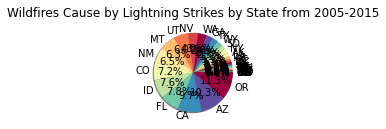

In [73]:
plt.subplot(the_grid[0, 1], aspect=1, title='Wildfires Cause by Lightning Strikes by State from 2004-2015')
State = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()